<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Разведывательный-анализ-данных" data-toc-modified-id="Разведывательный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Разведывательный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Обработка-данных-и-генерация-признаков" data-toc-modified-id="Обработка-данных-и-генерация-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка данных и генерация признаков</a></span><ul class="toc-item"><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li><li><span><a href="#Погодные-признаки" data-toc-modified-id="Погодные-признаки-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Погодные признаки</a></span></li><li><span><a href="#Временные-признаки" data-toc-modified-id="Временные-признаки-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Временные признаки</a></span></li></ul></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li><li><span><a href="#Предсказание-на-тестовой-выборке" data-toc-modified-id="Предсказание-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предсказание на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Метрики" data-toc-modified-id="Метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Метрики</a></span></li><li><span><a href="#Важность-признаков" data-toc-modified-id="Важность-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Важность признаков</a></span></li><li><span><a href="#Сравнение-предсказания-и-реальных-данных" data-toc-modified-id="Сравнение-предсказания-и-реальных-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение предсказания и реальных данных</a></span></li></ul></li><li><span><a href="#Выгрузка-предобученной-модели" data-toc-modified-id="Выгрузка-предобученной-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выгрузка предобученной модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

<h1>Энергетический оракул<span class="tocSkip"></span></h1>

<h2>Постановка задачи<span class="tocSkip"></span></h2>

В данной задаче необходимо разработать предиктивную модель, которая позволит прогнозировать энергпотребление регионе на основе имеющихся данных о потреблении электроэнергии в прошлом и соответствующих факторах, влияющих на потребление энергии. Модель должна быть способна учесть сезонные, временные и другие зависимости для более точного прогноза. Модель должна предсказывать почасовое потребление региона на одни сутки.
Метрики модели:
- MAE (главная метрика
- MAPE (вспомогательная метрика)
- R2-score (вспомогательная метрика)

Предоставлено два датасета в формате .csv: train_dataset и test_dataset.

## Разведывательный анализ данных

### Импорт данных

Импортируем необходимые для работы библиотеки. Считаем данные из csv-файлов в датафреймы, сохраним в переменные и выведем на экран каждую таблицу.

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    cross_val_score,
    TimeSeriesSplit
)

from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge
)

# dump
import pickle
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose

# pandas option
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
try:
    train_df = pd.read_csv('train_dataset.csv')
    test_df = pd.read_csv('test_dataset.csv')
except:
    print('Датасет отсутствует')

In [3]:
# создание переменной с сезонностью с 2021 года
temp = train_df.copy()    
temp['time'] = temp['time'].apply(lambda x: str(x) + ':00:00')
temp['datetime'] = temp['date'] +' ' + temp['time']
temp['datetime'] = pd.to_datetime(temp['datetime'])
temp.set_index('datetime', inplace=True)
temp = temp['2021-01-01':]
temp = temp['target']
decomposed = seasonal_decompose(temp)
season = decomposed.seasonal

In [4]:
# оставляем данные только с 2021 года    
train_df = train_df.loc[train_df['date'] >= '2021-01-01']

datasets = [train_df, test_df]

In [5]:
'''
Функция выводит 5 первых и последних
записей датасета
'''
def disp(data):
    print(data.shape)
    return pd.concat([data.head(), data.tail()])

In [6]:
for i in datasets:
    display(
        disp(i)
    )

(19680, 7)


,date,time,target,temp,temp_pred,weather_pred,weather_fact
17544,2021-01-01,0,498.408,-2.5,0.0,обл с пр,туман
17545,2021-01-01,1,479.057,-2.5,0.0,обл с пр,туман
17546,2021-01-01,2,470.353,-2.5,0.0,обл с пр,туман
17547,2021-01-01,3,452.482,-2.5,-1.0,обл с пр,туман
17548,2021-01-01,4,439.742,-2.5,-1.0,обл с пр,туман
37219,2023-03-31,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка"
37220,2023-03-31,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка"
37221,2023-03-31,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка"
37222,2023-03-31,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка"
37223,2023-03-31,23,518.685,6.3,5.0,"пасм, 61%","пасм, дымка"


(2928, 7)


,date,time,target,temp,temp_pred,weather_pred,weather_fact
0,2023-04-01,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось"
1,2023-04-01,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось"
2,2023-04-01,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось"
3,2023-04-01,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка"
4,2023-04-01,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка"
2923,2023-07-31,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл
2924,2023-07-31,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл
2925,2023-07-31,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл
2926,2023-07-31,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл
2927,2023-07-31,23,416.078,15.8,17.0,"пасм, 24% дождь",п/обл


Данные подгрузились нормально, можно заметить, что интервала между данными нет – тестовый датасет начинается сразу, как заканчивается второй. Приступим к описанию данных.

### Описание данных

In [7]:
for i in datasets:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19680 entries, 17544 to 37223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19680 non-null  object 
 1   time          19680 non-null  int64  
 2   target        19680 non-null  float64
 3   temp          19680 non-null  float64
 4   temp_pred     19592 non-null  float64
 5   weather_pred  19592 non-null  object 
 6   weather_fact  19679 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2928 non-null   object 
 1   time          2928 non-null   int64  
 2   target        2928 non-null   float64
 3   temp          2928 non-null   float64
 4   temp_pred     2904 non-null   float64
 5   weather_pred  2904 non-null   object 
 6   weather_fact  2928 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 160.2+ KB


None

В обоих датасетах 7 признаков. В тренировочном 19680 объектов, в тестовом – 2928.

Признаки:
- `date` — временной ряд в формате гггг-мм-дд;
- `time` — час;
- `temp` — фактическая температура окружающей среды, градусы;
- `temp_pred` — прогноз температуры окружающей среды, градусы;
- `weather_fact` — фактическая погода на данный час, категорийный признак;
- `weather_pred` — предсказанная погода на данный час, категорийный признак.

Целевой признак:
- `target` — количество потребленной электроэнергии за указанный час, МВт.

In [8]:
for i in datasets:
    display(i.describe().T)
    display(i.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
time,19680.0,11.500000,6.922362,0.000,5.7500,11.500,17.25000,23.000
target,19680.0,501.854663,102.563170,266.494,437.5235,490.274,579.58825,767.888
temp,19680.0,7.754324,8.530123,-21.700,1.2000,6.900,13.80000,31.400
temp_pred,19592.0,7.857442,8.480717,-20.000,1.0000,7.000,14.00000,33.000


,count,unique,top,freq
date,19680,820,2022-05-14,24
weather_pred,19592,1497,ясно,2148
weather_fact,19679,395,ясно,2617


,count,mean,std,min,25%,50%,75%,max
time,2928.0,11.500000,6.923369,0.000,5.75000,11.5000,17.25000,23.000
target,2928.0,419.467047,71.393070,264.819,371.38425,431.4775,462.41425,607.474
temp,2928.0,13.768613,6.479879,-3.100,9.20000,14.0000,18.70000,31.700
temp_pred,2904.0,13.910124,6.381692,-3.000,9.00000,15.0000,19.00000,29.000


,count,unique,top,freq
date,2928,122,2023-07-20,24
weather_pred,2904,246,ясно,666
weather_fact,2928,121,ясно,396


 В данных есть пропуски. Количественные данные на первый взгляд без аномалий. В категорийных признаках до полутора тысяч категорий.

### Визуализация

Построим графики для лучшего понимания данных.

In [9]:
'''
Функция строит спаренный график гистограмму и боксплот
Принимает признак с данными, подпись по X и название графика
'''

def hist_box(data, xlabel, title, bins=100):
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.2, .8)},
        figsize=(10,5))
    fig.subplots_adjust(hspace=0.05)
    sns.boxplot(x=data, ax=ax_box, color='green')
    sns.histplot(data=data, ax=ax_hist, bins=bins)
    
    ax_box.set_xlabel('')
    ax_box.set_ylabel(data.name)
    ax_hist.set_xlabel(xlabel)
    ax_hist.set_ylabel('Частота')
    ax_hist.grid()
    ax_box.set_title(title);

In [10]:
# данные для вывода диаграмм
names = ['target', 'temp', 'temp_pred']
names_dict = {
    'Диаграмма размаха и гистограмма затраченной энергии':
    'Количество затраченной энергии, МВт',
    'Диаграмма размаха и гистограмма фактической температуры':
    'Температура, градусы',
    'Диаграмма размаха и гистограмма предсказанной температуры':
    'Температура, градусы'}

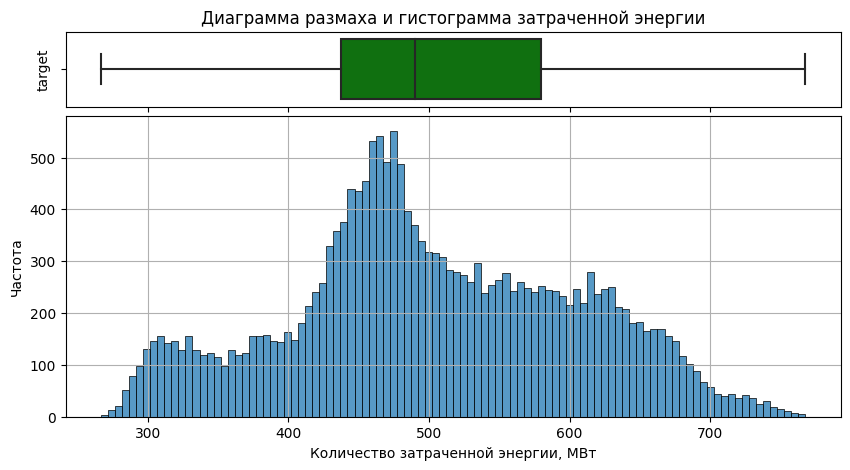

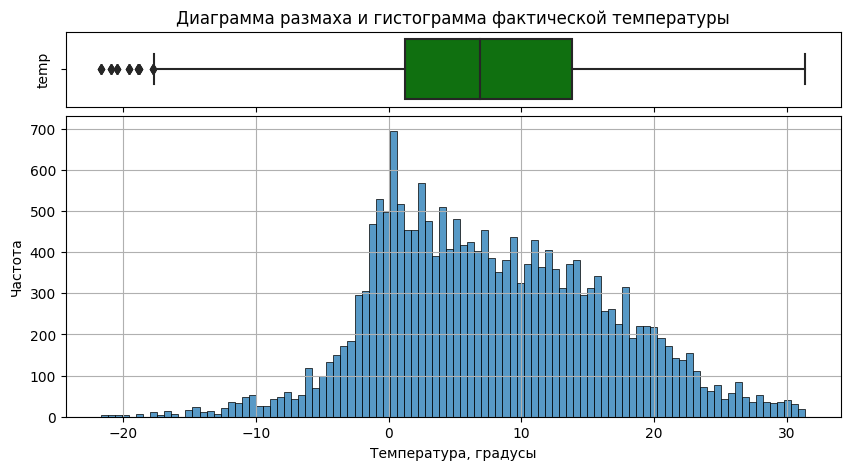

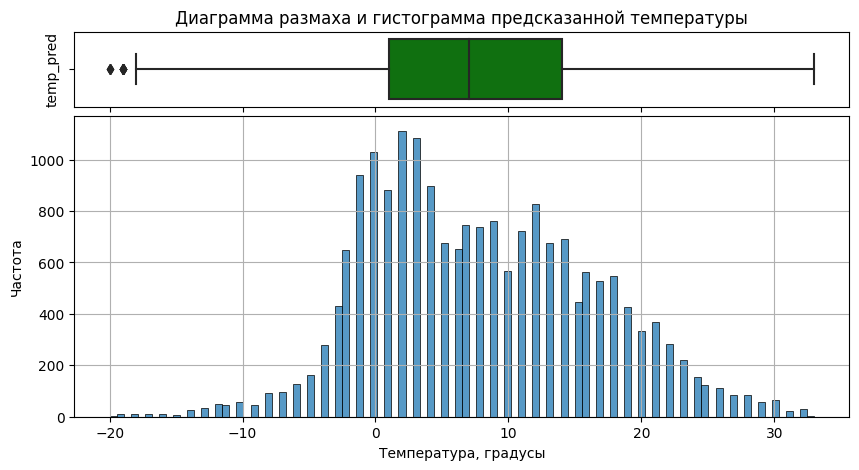

In [11]:
k = 0
for i,j in names_dict.items():
    hist_box(
        train_df[names[k]],
        j,
        i
    )
    k += 1

Распределения выглядят правдободобно, аномальных пиков не замечено. Проверим можно ли доверять признаку с предсказанной температурой с помощью диаграммы плотности.

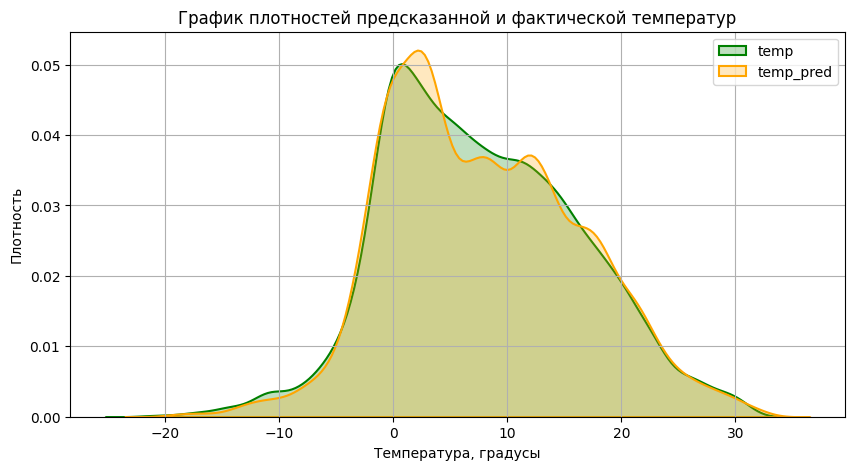

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=train_df['temp'],
    fill=True,
    linewidth=1.5,
    color='green',
    ax=ax
)
sns.kdeplot(
    data=train_df['temp_pred'],
    fill=True,
    linewidth=1.5,
    color='orange',
    ax=ax
)
ax.set_xlabel('Температура, градусы')
ax.set_ylabel('Плотность')
ax.grid()
ax.legend(['temp', 'temp_pred'])
ax.set_title('График плотностей предсказанной и фактической температур');

Графики схожи, прогноз температуры в среднем ошибается на один градус. При построении модели можно ориентироваться на предсказанную температуру. Визуализируем отсутствующие данные.

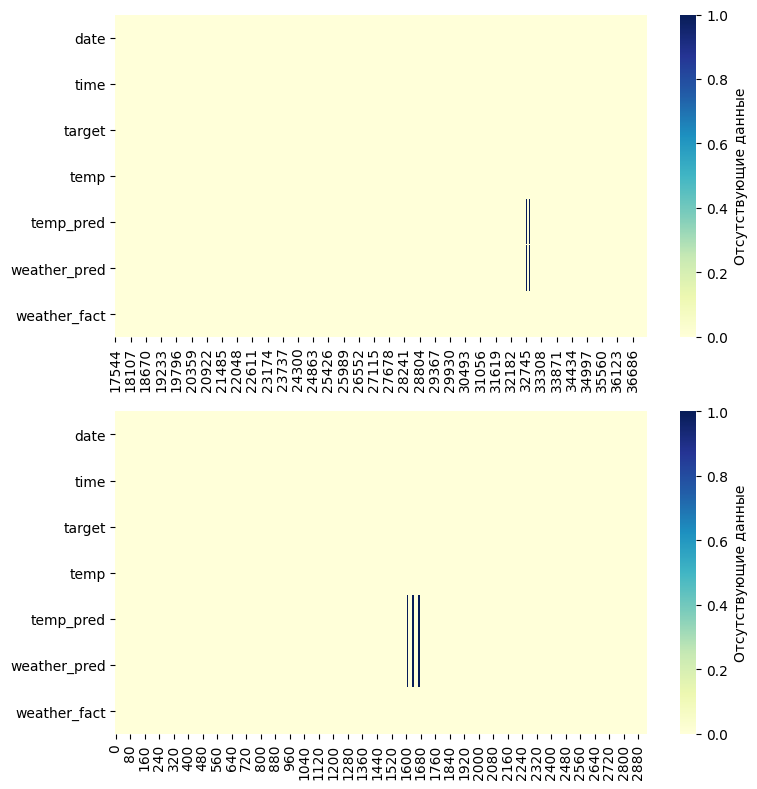

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 8))
j = 0
for i in datasets:
    sns.heatmap(i.isna().transpose(),
    cmap="YlGnBu",
    cbar_kws={'label': 'Отсутствующие данные'},
    ax=ax[j])
    fig.tight_layout();
    j += 1
    

Таких данных немного и они носят случайный характер.

### Обработка данных и генерация признаков

#### Пропуски и дубликаты

Проверим, монотонны ли временные данные.

In [14]:
# проверка монотонности
for i in datasets:
    i['datetime'] = i['date']
    i['date'] = pd.to_datetime(i['date'])
    i.set_index('date', inplace = True)
    display(i.index.is_monotonic_increasing)

True

True

Отобразим количество явных дубликатов и пропущенных значений.

In [15]:
# проверка явных дубликатов
for i in datasets:
    display(i.duplicated().sum())

0

0

In [16]:
# проверка пропусков
for i in datasets:
    display(i.isna().sum())

time             0
target           0
temp             0
temp_pred       88
weather_pred    88
weather_fact     1
datetime         0
dtype: int64

time             0
target           0
temp             0
temp_pred       24
weather_pred    24
weather_fact     0
datetime         0
dtype: int64

Для того, чтобы заполнить пропуски, создадим новые признаки: номер месяца, номер дня месяца и номер дня недели. Далее сгруппируем данные таким образом, чтобы для каждой комбинации час-день-месяц была получена средняя фактическая температура и последняя фактическая погода. Это делается для того, чтобы впоследствии при прогнозе объема электроэнергии у нас была база данных, из которой можно подтягивать значения предсказанной температуры при отсутствии оной в прогнозе на следующие сутки. Так модель станет более надежной.

In [17]:
# добавление фичей
for i in datasets:
    i['month'] = i.index.month
    i['day'] = i.index.day
    i['weekday'] = i.index.dayofweek
    display(disp(i))

(19680, 10)


,time,target,temp,temp_pred,weather_pred,weather_fact,datetime,month,day,weekday
date,,,,,,,,,,
2021-01-01,0,498.408,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4
2021-01-01,1,479.057,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4
2021-01-01,2,470.353,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4
2021-01-01,3,452.482,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4
2021-01-01,4,439.742,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4
2023-03-31,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4
2023-03-31,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4
2023-03-31,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4
2023-03-31,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4


(2928, 10)


,time,target,temp,temp_pred,weather_pred,weather_fact,datetime,month,day,weekday
date,,,,,,,,,,
2023-04-01,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5
2023-04-01,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5
2023-04-01,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5
2023-04-01,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5
2023-04-01,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5
2023-07-31,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0
2023-07-31,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0
2023-07-31,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0
2023-07-31,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0


In [18]:
# создание ряда с агрегированным weather_fact по часу, месяц и дню
weather = train_df.groupby(
    ['time','month', 'day'])['weather_fact'].agg('last')
# запись .csv для дальнейшего использования в модулей main.py
weather.to_csv('weather.csv')
weather.head()

time  month  day
0     1      1      пасм, дождь, ветер
             2                   дымка
             3            дождь, ветер
             4             пасм, дождь
             5             пасм, дождь
Name: weather_fact, dtype: object

In [19]:
# создание ряда с агрегированным temp по часу, месяц и дню
temp = train_df.groupby(
    ['time', 'month', 'day'])['temp'].agg('mean')
# запись .csv для дальнейшего использования в модулей main.py
temp.to_csv('temp.csv')
temp.head()

time  month  day
0     1      1      4.533333
             2      2.100000
             3      4.400000
             4      2.300000
             5      4.200000
Name: temp, dtype: float64

In [20]:
# мерджим датасеты, чтобы каждому часу соответствовало свое значение
merge_list = [temp, weather]
for j in merge_list:
    train_df = train_df.merge(
        how='left',
        right=j,
        left_on=['time', 'month', 'day'],
        right_on=['time', 'month', 'day'])
    test_df = test_df.merge(
        how='left',
        right=j,
        left_on=['time', 'month', 'day'],
        right_on=['time', 'month', 'day'])
datasets = [train_df, test_df]
for i in datasets:
    display(disp(i))

(19680, 12)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y
0,0,498.408,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер"
1,1,479.057,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер"
2,2,470.353,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер"
3,3,452.482,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер"
4,4,439.742,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер"
19675,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка"
19676,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка"
19677,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка"
19678,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка"
19679,23,518.685,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка"


(2928, 12)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y
0,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер"
1,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер"
2,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер"
3,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно
4,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно
2923,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно
2924,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно
2925,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно
2926,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно
2927,23,416.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно


При обработке данных были обнаружены странные категории '0' и '?' в признаке weather_pred. Причем temp_pred для этой категории тоже выглядит странно. Заменим битые данные значениями из фактической температуры и погоды.

In [21]:
train_df[train_df['weather_pred'] == '0']

,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y
1129,1,533.846,-4.0,0.0,0,облачно,2021-02-17,2,17,2,2.200000,слаб.морось
1130,2,514.198,-4.0,0.0,0,облачно,2021-02-17,2,17,2,2.200000,слаб.морось
1132,4,500.615,-6.0,0.0,0,облачно,2021-02-17,2,17,2,1.800000,"пасм, морось, туман"
1133,5,502.085,-6.0,0.0,0,облачно,2021-02-17,2,17,2,1.800000,"пасм, морось, туман"
1135,7,570.422,-10.0,0.0,0,облачно,2021-02-17,2,17,2,0.733333,"пасм, морось, туман"
...,...,...,...,...,...,...,...,...,...,...,...,...
15401,17,506.782,13.4,0.0,0,пер.обл.,2022-10-04,10,4,1,14.800000,пер.обл.
15403,19,529.866,8.4,0.0,0,пер.обл.,2022-10-04,10,4,1,11.050000,пер.обл.
15404,20,543.304,8.4,0.0,0,пер.обл.,2022-10-04,10,4,1,11.050000,пер.обл.
15406,22,510.365,8.4,0.0,0,пер.обл.,2022-10-04,10,4,1,10.200000,пер.обл.


In [22]:
# заполняем пропуски и категории 0, ? значениями из фактических данных
for i in datasets:
    i.loc[i['temp_pred'].isna(), 'temp_pred'] = \
    i.loc[i['temp_pred'].isna(), 'temp_y']
    
    i.loc[i['weather_pred'].isna(), 'weather_pred'] = \
    i.loc[i['weather_pred'].isna(), 'weather_fact_y']

    i.loc[i['weather_pred'] == '0', 'temp_pred'] = \
    i.loc[i['weather_pred'] == '0', 'temp_y']
    
    i.loc[i['weather_pred'] == '0', 'weather_pred'] = \
    i.loc[i['weather_pred'] == '0', 'weather_fact_y']
    
    i.loc[i['weather_pred'] == '?', 'weather_pred'] = \
    i.loc[i['weather_pred'] == '?', 'weather_fact_y']
    
    
    display(i.isna().sum())

time              0
target            0
temp_x            0
temp_pred         0
weather_pred      0
weather_fact_x    1
datetime          0
month             0
day               0
weekday           0
temp_y            0
weather_fact_y    0
dtype: int64

time              0
target            0
temp_x            0
temp_pred         0
weather_pred      0
weather_fact_x    0
datetime          0
month             0
day               0
weekday           0
temp_y            0
weather_fact_y    0
dtype: int64

In [23]:
# добавление признака сезонности в тренировочную выборку
train_df['season'] = season.reset_index()['seasonal']
disp(train_df)

(19680, 13)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y,season
0,0,498.408,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-32.858359
1,1,479.057,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-68.644275
2,2,470.353,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-90.416565
3,3,452.482,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-101.624973
4,4,439.742,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-108.249455
19675,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка",57.993636
19676,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка",55.666985
19677,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",49.223817
19678,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",37.918844
19679,23,518.685,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",9.312411


In [24]:
# добавление признака сезонности в тестовую выборку
test_df['season'] = season[:len(test_df)].reset_index()['seasonal']
disp(test_df)

(2928, 13)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y,season
0,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-32.858359
1,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-68.644275
2,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-90.416565
3,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно,-101.624973
4,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно,-108.249455
2923,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно,57.993636
2924,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно,55.666985
2925,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,49.223817
2926,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,37.918844
2927,23,416.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,9.312411


In [25]:
# создание признаков вчерашнего дня для трейна
means = test_df.groupby(
    test_df.index // 24).aggregate(
    {'temp_x': ['max', 'min','mean'],
     'target': ['max', 'min','mean'],
     'datetime':'first'})
means.columns = means.columns.droplevel()
means.columns = [
    'yesterday_max_temp',
    'yestarday_min_temp',
    'yesterday_mean_temp',
    'yesterday_max_target',
    'yestarday_min_target',
    'yesterday_mean_target',
    'datetime']

# сдвигаем данные на один день 
means_test = means.drop('datetime', axis=1).shift(1)
means_test['datetime'] = means['datetime']
disp(means_test)

(122, 7)


,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01
1,6.5,2.3,4.7375,576.638,405.742,506.049000,2023-04-02
2,7.4,2.0,3.8625,582.085,413.094,501.086208,2023-04-03
3,4.2,-1.2,1.2750,590.577,415.646,526.415667,2023-04-04
4,2.8,-3.1,0.0375,604.105,434.327,543.451708,2023-04-05
117,19.7,12.7,16.1250,464.936,292.488,403.834208,2023-07-27
118,20.9,12.0,16.5875,465.171,291.799,403.204625,2023-07-28
119,20.5,11.0,15.6750,470.428,290.541,406.450500,2023-07-29
120,24.8,12.2,18.8625,459.522,294.160,396.891500,2023-07-30
121,23.0,16.3,18.8250,444.076,285.304,387.347667,2023-07-31


In [26]:
# создание признаков вчерашнего дня для трейна
means = train_df.groupby(
    train_df.index // 24).aggregate(
    {'temp_x': ['max', 'min','mean'],
     'target': ['max', 'min','mean'],
     'datetime':'first'})
means.columns = means.columns.droplevel()
means.columns = [
    'yesterday_max_temp',
    'yestarday_min_temp',
    'yesterday_mean_temp',
    'yesterday_max_target',
    'yestarday_min_target',
    'yesterday_mean_target',
    'datetime']

# заполнение первой строки тестовой выборки
means_test.iloc[0, 0:6] = means.iloc[-1, 0:6]

In [27]:
# сдвигаем данные на один день 
means_train = means.drop('datetime', axis=1).shift(1)
means_train['datetime'] = means['datetime']
disp(means_train)

(820, 7)


,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01
1,-2.1,-3.0,-2.6000,549.329,426.587,487.563833,2021-01-02
2,0.6,-1.6,-0.7500,571.033,420.661,501.461000,2021-01-03
3,-0.4,-1.7,-1.0250,600.419,416.499,517.893375,2021-01-04
4,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,2021-01-05
815,7.8,3.1,5.7500,564.381,393.980,488.400708,2023-03-27
816,3.9,-2.4,1.4375,596.847,401.041,521.399833,2023-03-28
817,0.9,-3.9,-1.3000,609.268,429.317,541.180458,2023-03-29
818,6.2,-3.8,2.3750,593.418,435.245,532.128208,2023-03-30
819,11.3,3.7,7.4375,582.464,417.792,519.957708,2023-03-31


In [28]:
# мерджим датасеты, чтобы каждому дню соответствовало свое значение
train_df = train_df.merge(
    how='left',
    right=means_train,
    left_on=['datetime'],
    right_on=['datetime'])
test_df = test_df.merge(
    how='left',
    right=means_test,
    left_on=['datetime'],
    right_on=['datetime'])
datasets = [train_df, test_df]
for i in datasets:
    display(disp(i))

(19680, 19)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target
0,0,498.408,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-32.858359,NaN,NaN,NaN,NaN,NaN,NaN
1,1,479.057,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-68.644275,NaN,NaN,NaN,NaN,NaN,NaN
2,2,470.353,-2.5,0.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-90.416565,NaN,NaN,NaN,NaN,NaN,NaN
3,3,452.482,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-101.624973,NaN,NaN,NaN,NaN,NaN,NaN
4,4,439.742,-2.5,-1.0,обл с пр,туман,2021-01-01,1,1,4,4.533333,"пасм, дождь, ветер",-108.249455,NaN,NaN,NaN,NaN,NaN,NaN
19675,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка",57.993636,11.3,3.7,7.4375,582.464,417.792,519.957708
19676,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,6.066667,"пасм, дымка",55.666985,11.3,3.7,7.4375,582.464,417.792,519.957708
19677,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",49.223817,11.3,3.7,7.4375,582.464,417.792,519.957708
19678,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",37.918844,11.3,3.7,7.4375,582.464,417.792,519.957708
19679,23,518.685,6.3,5.0,"пасм, 61%","пасм, дымка",2023-03-31,3,31,4,3.400000,"пасм, дымка",9.312411,11.3,3.7,7.4375,582.464,417.792,519.957708


(2928, 19)


,time,target,temp_x,temp_pred,weather_pred,weather_fact_x,datetime,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target
0,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-32.858359,11.8,6.3,8.8125,587.190,411.703,517.289375
1,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-68.644275,11.8,6.3,8.8125,587.190,411.703,517.289375
2,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",2023-04-01,4,1,5,1.40,"обл, ветер",-90.416565,11.8,6.3,8.8125,587.190,411.703,517.289375
3,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно,-101.624973,11.8,6.3,8.8125,587.190,411.703,517.289375
4,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",2023-04-01,4,1,5,0.25,облачно,-108.249455,11.8,6.3,8.8125,587.190,411.703,517.289375
2923,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно,57.993636,23.0,16.3,18.8250,444.076,285.304,387.347667
2924,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,17.40,пасмурно,55.666985,23.0,16.3,18.8250,444.076,285.304,387.347667
2925,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,49.223817,23.0,16.3,18.8250,444.076,285.304,387.347667
2926,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,37.918844,23.0,16.3,18.8250,444.076,285.304,387.347667
2927,23,416.078,15.8,17.0,"пасм, 24% дождь",п/обл,2023-07-31,7,31,0,15.45,пасмурно,9.312411,23.0,16.3,18.8250,444.076,285.304,387.347667


In [29]:
# переименование признака и установка почасового индекса
for i in datasets:
    i['str_time'] = i['time'].apply(lambda x: str(x) + ':00:00')
    i['datetime'] = i['datetime'] +' ' + i['str_time']
    i['datetime'] = pd.to_datetime(i['datetime'])
    i.set_index('datetime', inplace=True)
    i.rename(columns={'temp_x':'temp'}, inplace=True)
    i.drop('str_time', axis=1, inplace=True)
    display(disp(i))

(19680, 18)


,time,target,temp,temp_pred,weather_pred,weather_fact_x,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target
datetime,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,498.408,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-32.858359,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,1,479.057,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-68.644275,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,2,470.353,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-90.416565,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,3,452.482,-2.5,-1.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-101.624973,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,4,439.742,-2.5,-1.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-108.249455,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31 19:00:00,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",3,31,4,6.066667,"пасм, дымка",57.993636,11.3,3.7,7.4375,582.464,417.792,519.957708
2023-03-31 20:00:00,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",3,31,4,6.066667,"пасм, дымка",55.666985,11.3,3.7,7.4375,582.464,417.792,519.957708
2023-03-31 21:00:00,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",3,31,4,3.400000,"пасм, дымка",49.223817,11.3,3.7,7.4375,582.464,417.792,519.957708
2023-03-31 22:00:00,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",3,31,4,3.400000,"пасм, дымка",37.918844,11.3,3.7,7.4375,582.464,417.792,519.957708


(2928, 18)


,time,target,temp,temp_pred,weather_pred,weather_fact_x,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target
datetime,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-32.858359,11.8,6.3,8.8125,587.190,411.703,517.289375
2023-04-01 01:00:00,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-68.644275,11.8,6.3,8.8125,587.190,411.703,517.289375
2023-04-01 02:00:00,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-90.416565,11.8,6.3,8.8125,587.190,411.703,517.289375
2023-04-01 03:00:00,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",4,1,5,0.25,облачно,-101.624973,11.8,6.3,8.8125,587.190,411.703,517.289375
2023-04-01 04:00:00,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",4,1,5,0.25,облачно,-108.249455,11.8,6.3,8.8125,587.190,411.703,517.289375
2023-07-31 19:00:00,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,7,31,0,17.40,пасмурно,57.993636,23.0,16.3,18.8250,444.076,285.304,387.347667
2023-07-31 20:00:00,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,7,31,0,17.40,пасмурно,55.666985,23.0,16.3,18.8250,444.076,285.304,387.347667
2023-07-31 21:00:00,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,7,31,0,15.45,пасмурно,49.223817,23.0,16.3,18.8250,444.076,285.304,387.347667
2023-07-31 22:00:00,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,7,31,0,15.45,пасмурно,37.918844,23.0,16.3,18.8250,444.076,285.304,387.347667


#### Погодные признаки

Добавим новые признаки:
- осадки `fallout`,
- ветер `wind`,
- ясно `sun`,
- облачно `clouds`.

Основываясь на предсказанной погоде, будем отмечать наличие погодного являение единицей, а его отсутствие нулём.

In [30]:
#добавляем новые фичи
for i in datasets:
    i['fallout'] = 0
    i['wind'] = 0
    i['sun'] = 0
    i['clouds'] = 0
    display(disp(i))

(19680, 22)


,time,target,temp,temp_pred,weather_pred,weather_fact_x,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds
datetime,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,498.408,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-32.858359,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2021-01-01 01:00:00,1,479.057,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-68.644275,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2021-01-01 02:00:00,2,470.353,-2.5,0.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-90.416565,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2021-01-01 03:00:00,3,452.482,-2.5,-1.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-101.624973,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2021-01-01 04:00:00,4,439.742,-2.5,-1.0,обл с пр,туман,1,1,4,4.533333,"пасм, дождь, ветер",-108.249455,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2023-03-31 19:00:00,19,552.960,7.9,6.0,"пасм, 61%","пасм, дымка",3,31,4,6.066667,"пасм, дымка",57.993636,11.3,3.7,7.4375,582.464,417.792,519.957708,0,0,0,0
2023-03-31 20:00:00,20,563.985,7.9,6.0,"пасм, 61%","пасм, дымка",3,31,4,6.066667,"пасм, дымка",55.666985,11.3,3.7,7.4375,582.464,417.792,519.957708,0,0,0,0
2023-03-31 21:00:00,21,560.191,6.3,5.0,"пасм, 61%","пасм, дымка",3,31,4,3.400000,"пасм, дымка",49.223817,11.3,3.7,7.4375,582.464,417.792,519.957708,0,0,0,0
2023-03-31 22:00:00,22,538.796,6.3,5.0,"пасм, 61%","пасм, дымка",3,31,4,3.400000,"пасм, дымка",37.918844,11.3,3.7,7.4375,582.464,417.792,519.957708,0,0,0,0


(2928, 22)


,time,target,temp,temp_pred,weather_pred,weather_fact_x,month,day,weekday,temp_y,weather_fact_y,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds
datetime,,,,,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,0,479.282,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-32.858359,11.8,6.3,8.8125,587.190,411.703,517.289375,0,0,0,0
2023-04-01 01:00:00,1,445.182,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-68.644275,11.8,6.3,8.8125,587.190,411.703,517.289375,0,0,0,0
2023-04-01 02:00:00,2,424.225,5.7,5.0,"пасм, 58%","пасм, морось",4,1,5,1.40,"обл, ветер",-90.416565,11.8,6.3,8.8125,587.190,411.703,517.289375,0,0,0,0
2023-04-01 03:00:00,3,413.866,5.0,4.0,"пасм, 71% дождь","пасм, дымка",4,1,5,0.25,облачно,-101.624973,11.8,6.3,8.8125,587.190,411.703,517.289375,0,0,0,0
2023-04-01 04:00:00,4,408.146,5.0,4.0,"пасм, 71% дождь","пасм, дымка",4,1,5,0.25,облачно,-108.249455,11.8,6.3,8.8125,587.190,411.703,517.289375,0,0,0,0
2023-07-31 19:00:00,19,453.173,17.2,18.0,"пасм, 24% дождь",п/обл,7,31,0,17.40,пасмурно,57.993636,23.0,16.3,18.8250,444.076,285.304,387.347667,0,0,0,0
2023-07-31 20:00:00,20,446.287,17.2,18.0,"пасм, 24% дождь",п/обл,7,31,0,17.40,пасмурно,55.666985,23.0,16.3,18.8250,444.076,285.304,387.347667,0,0,0,0
2023-07-31 21:00:00,21,444.373,15.8,17.0,"пасм, 24% дождь",п/обл,7,31,0,15.45,пасмурно,49.223817,23.0,16.3,18.8250,444.076,285.304,387.347667,0,0,0,0
2023-07-31 22:00:00,22,449.078,15.8,17.0,"пасм, 24% дождь",п/обл,7,31,0,15.45,пасмурно,37.918844,23.0,16.3,18.8250,444.076,285.304,387.347667,0,0,0,0


In [31]:
# заполнение новых фичей по ключевым словам
for i in datasets:
    i['weather_pred'] = i['weather_pred'].apply(str.lower)
    
    i.loc[i['weather_pred'].str.contains(r'вет|шторм|метел'), 'wind'] = 1
    i.loc[i['weather_pred'].str.contains(r'ясн|солн|пр|жар|душ'), 'sun'] = 1
    i.loc[i['weather_pred'].str.contains(r'моро|гроз|дож|лив|што|метел|сн|%|мокр'), 'fallout'] = 1
    i.loc[i['weather_pred'].str.contains(r'пасм|об|дым|тум'), 'clouds'] = 1
    
    i.loc[i['weather_pred'].str.contains(r'вет|шторм|метел'), 'weather_pred'] = 'Del'
    i.loc[i['weather_pred'].str.contains(r'пасм|об|дым|тум'), 'weather_pred'] = 'Del'    
    i.loc[i['weather_pred'].str.contains(r'ясн|солн|пр|жар|душ'), 'weather_pred'] = 'Del'
    i.loc[i['weather_pred'].str.contains(r'моро|гроз|дож|лив|што|метел|сн|%|мокр'), 'weather_pred'] = 'Del'
    
    # проверка все ли категории конвертировались
    display(i['weather_pred'].unique())

array(['Del'], dtype=object)

array(['Del'], dtype=object)

#### Временные признаки

Чтобы сохранить цикличность данных, сконвертируем часы в косинус и синус.

In [32]:
# конвертация часа в синус-косинус
for i in datasets:
    i['hour_sin'] = np.sin(2 * np.pi * i['time']/24.0)
    i['hour_cos'] = np.cos(2 * np.pi * i['time']/24.0)
    
    # дроп ненужных фичей
    i.drop(
        ['weather_pred',
         'temp_y',
         'weather_fact_x',
         'weather_fact_y',
         'time'], axis=1, inplace=True
    )
    
    display(disp(i))

(19680, 19)


,target,temp,temp_pred,month,day,weekday,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds,hour_sin,hour_cos
datetime,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,498.408,-2.5,0.0,1,1,4,-32.858359,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.000000,1.000000
2021-01-01 01:00:00,479.057,-2.5,0.0,1,1,4,-68.644275,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.258819,0.965926
2021-01-01 02:00:00,470.353,-2.5,0.0,1,1,4,-90.416565,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.500000,0.866025
2021-01-01 03:00:00,452.482,-2.5,-1.0,1,1,4,-101.624973,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.707107,0.707107
2021-01-01 04:00:00,439.742,-2.5,-1.0,1,1,4,-108.249455,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0.866025,0.500000
2023-03-31 19:00:00,552.960,7.9,6.0,3,31,4,57.993636,11.3,3.7,7.4375,582.464,417.792,519.957708,1,0,0,1,-0.965926,0.258819
2023-03-31 20:00:00,563.985,7.9,6.0,3,31,4,55.666985,11.3,3.7,7.4375,582.464,417.792,519.957708,1,0,0,1,-0.866025,0.500000
2023-03-31 21:00:00,560.191,6.3,5.0,3,31,4,49.223817,11.3,3.7,7.4375,582.464,417.792,519.957708,1,0,0,1,-0.707107,0.707107
2023-03-31 22:00:00,538.796,6.3,5.0,3,31,4,37.918844,11.3,3.7,7.4375,582.464,417.792,519.957708,1,0,0,1,-0.500000,0.866025


(2928, 19)


,target,temp,temp_pred,month,day,weekday,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds,hour_sin,hour_cos
datetime,,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,479.282,5.7,5.0,4,1,5,-32.858359,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.000000,1.000000
2023-04-01 01:00:00,445.182,5.7,5.0,4,1,5,-68.644275,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.258819,0.965926
2023-04-01 02:00:00,424.225,5.7,5.0,4,1,5,-90.416565,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.500000,0.866025
2023-04-01 03:00:00,413.866,5.0,4.0,4,1,5,-101.624973,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.707107,0.707107
2023-04-01 04:00:00,408.146,5.0,4.0,4,1,5,-108.249455,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.866025,0.500000
2023-07-31 19:00:00,453.173,17.2,18.0,7,31,0,57.993636,23.0,16.3,18.8250,444.076,285.304,387.347667,1,0,0,1,-0.965926,0.258819
2023-07-31 20:00:00,446.287,17.2,18.0,7,31,0,55.666985,23.0,16.3,18.8250,444.076,285.304,387.347667,1,0,0,1,-0.866025,0.500000
2023-07-31 21:00:00,444.373,15.8,17.0,7,31,0,49.223817,23.0,16.3,18.8250,444.076,285.304,387.347667,1,0,0,1,-0.707107,0.707107
2023-07-31 22:00:00,449.078,15.8,17.0,7,31,0,37.918844,23.0,16.3,18.8250,444.076,285.304,387.347667,1,0,0,1,-0.500000,0.866025


In [33]:
'''
Функция для добавления новых признаков в датасет.
Принимает датафрейм, начало и конец отстающих значений
'''

def make_features(df, start_lag, max_lag):
    
    df_copied = df.copy()
    
    # добавляем отстающие значения для таргета и температуры
    for lag in range(start_lag, max_lag + 1):
        df_copied['lag_{}'.format(lag)] = df_copied['target'].shift(lag)
        df_copied['temp_lag_{}'.format(lag)] = df_copied['temp'].shift(lag)        
   
    df_copied.dropna(inplace=True)
    
    return df_copied

In [34]:
copy_train = make_features(train_df, 25, 96)
copy_train.drop('temp', axis=1, inplace=True)
disp(copy_train)

(19584, 162)


,target,temp_pred,month,day,weekday,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds,hour_sin,hour_cos,lag_25,temp_lag_25,lag_26,temp_lag_26,lag_27,temp_lag_27,lag_28,temp_lag_28,lag_29,temp_lag_29,lag_30,temp_lag_30,lag_31,temp_lag_31,lag_32,temp_lag_32,lag_33,temp_lag_33,lag_34,temp_lag_34,lag_35,temp_lag_35,lag_36,temp_lag_36,lag_37,temp_lag_37,lag_38,temp_lag_38,lag_39,temp_lag_39,lag_40,temp_lag_40,lag_41,temp_lag_41,lag_42,temp_lag_42,lag_43,temp_lag_43,lag_44,temp_lag_44,lag_45,temp_lag_45,lag_46,temp_lag_46,lag_47,temp_lag_47,lag_48,temp_lag_48,lag_49,temp_lag_49,lag_50,temp_lag_50,lag_51,temp_lag_51,lag_52,temp_lag_52,lag_53,temp_lag_53,lag_54,temp_lag_54,lag_55,temp_lag_55,lag_56,temp_lag_56,lag_57,temp_lag_57,lag_58,temp_lag_58,lag_59,temp_lag_59,lag_60,temp_lag_60,lag_61,temp_lag_61,lag_62,temp_lag_62,lag_63,temp_lag_63,lag_64,temp_lag_64,lag_65,temp_lag_65,lag_66,temp_lag_66,lag_67,temp_lag_67,lag_68,temp_lag_68,lag_69,temp_lag_69,lag_70,temp_lag_70,lag_71,temp_lag_71,lag_72,temp_lag_72,lag_73,temp_lag_73,lag_74,temp_lag_74,lag_75,temp_lag_75,lag_76,temp_lag_76,lag_77,temp_lag_77,lag_78,temp_lag_78,lag_79,temp_lag_79,lag_80,temp_lag_80,lag_81,temp_lag_81,lag_82,temp_lag_82,lag_83,temp_lag_83,lag_84,temp_lag_84,lag_85,temp_lag_85,lag_86,temp_lag_86,lag_87,temp_lag_87,lag_88,temp_lag_88,lag_89,temp_lag_89,lag_90,temp_lag_90,lag_91,temp_lag_91,lag_92,temp_lag_92,lag_93,temp_lag_93,lag_94,temp_lag_94,lag_95,temp_lag_95,lag_96,temp_lag_96
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05 00:00:00,518.855,1.0,1,5,1,-32.858359,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.000000,1.000000,538.226,-1.1,563.946,-1.1,577.110,-1.1,588.667,-1.2,596.684,-1.2,600.419,-1.2,584.686,-1.0,572.676,-1.0,573.123,-1.0,574.762,-0.9,572.713,-0.9,565.004,-0.9,548.510,-0.4,514.306,-0.4,487.418,-0.4,456.547,-0.6,435.654,-0.6,421.133,-0.6,416.499,-1.3,418.975,-1.3,426.032,-1.3,441.267,-1.7,463.077,-1.7,492.007,-1.7,522.421,-0.8,543.538,-0.8,556.151,-0.8,562.260,-1.4,570.054,-1.4,571.033,-1.4,542.916,-0.7,527.924,-0.7,531.425,-0.7,537.638,0.6,543.533,0.6,543.497,0.6,528.855,-0.3,498.942,-0.3,476.957,-0.3,455.417,-0.7,436.517,-0.7,423.891,-0.7,420.661,-1.1,423.397,-1.1,430.699,-1.1,439.091,-1.6,460.346,-1.6,487.901,-1.6,513.923,-2.1,531.706,-2.1,540.053,-2.1,544.368,-2.4,549.329,-2.4,547.290,-2.4,526.422,-3.0,508.310,-3.0,508.993,-3.0,508.039,-2.5,503.509,-2.5,493.436,-2.5,471.548,-2.9,447.099,-2.9,444.222,-2.9,437.067,-2.9,429.775,-2.9,426.587,-2.9,429.814,-2.5,439.742,-2.5,452.482,-2.5,470.353,-2.5,479.057,-2.5,498.408,-2.5
2021-01-05 01:00:00,484.369,1.0,1,5,1,-68.644275,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.258819,0.965926,508.848,-1.2,538.226,-1.1,563.946,-1.1,577.110,-1.1,588.667,-1.2,596.684,-1.2,600.419,-1.2,584.686,-1.0,572.676,-1.0,573.123,-1.0,574.762,-0.9,572.713,-0.9,565.004,-0.9,548.510,-0.4,514.306,-0.4,487.418,-0.4,456.547,-0.6,435.654,-0.6,421.133,-0.6,416.499,-1.3,418.975,-1.3,426.032,-1.3,441.267,-1.7,463.077,-1.7,492.007,-1.7,522.421,-0.8,543.538,-0.8,556.151,-0.8,562.260,-1.4,570.054,-1.4,571.033,-1.4,542.916,-0.7,527.924,-0.7,531.425,-0.7,537.638,0.6,543.533,0.6,543.497,0.6,528.855,-0.3,498.942,-0.3,476.957,-0.3,455.417,-0.7,436.517,-0.7,423.891,-0.7,420.661,-1.1,423.397,-1.1,430.699,-1.1,439.091,-1.6,460.346,-1.6,487.901,-1.6,513.923,-2.1,531.706,-2.1,540.053,-2.1,544.368,-2.4,549.329,-2.4,547.290,-2.4,526.422,-3.0,508.310,-3.0,508.993,-3.0,508.039,-2.5,503.509,-2.5,493.436,-2.5,471.548,-2.9,447.099,-2.9,444.222,-2.9,437.067,-2.9,429.775,-2.9,426.587,-2.9,429.814,-2.5,439.742,-2.5,452.482,-2.5,470.353,-2.5,479.057,-2.5
2021-01-05 02:00:00,461.625,1.0,1,5,1,-90.416565,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.500000,0.866025,476.822,-1.2,508.848,-1.2,53

In [35]:
# добавляем 96 значений из трейна для создания лагов
# эти объекты удаляются в результаты работы функции
copy_test = make_features(
     pd.concat([train_df.iloc[-96:], test_df]), 25, 96)
copy_test.drop('temp', axis=1, inplace=True)
disp(copy_test)

(2928, 162)


,target,temp_pred,month,day,weekday,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds,hour_sin,hour_cos,lag_25,temp_lag_25,lag_26,temp_lag_26,lag_27,temp_lag_27,lag_28,temp_lag_28,lag_29,temp_lag_29,lag_30,temp_lag_30,lag_31,temp_lag_31,lag_32,temp_lag_32,lag_33,temp_lag_33,lag_34,temp_lag_34,lag_35,temp_lag_35,lag_36,temp_lag_36,lag_37,temp_lag_37,lag_38,temp_lag_38,lag_39,temp_lag_39,lag_40,temp_lag_40,lag_41,temp_lag_41,lag_42,temp_lag_42,lag_43,temp_lag_43,lag_44,temp_lag_44,lag_45,temp_lag_45,lag_46,temp_lag_46,lag_47,temp_lag_47,lag_48,temp_lag_48,lag_49,temp_lag_49,lag_50,temp_lag_50,lag_51,temp_lag_51,lag_52,temp_lag_52,lag_53,temp_lag_53,lag_54,temp_lag_54,lag_55,temp_lag_55,lag_56,temp_lag_56,lag_57,temp_lag_57,lag_58,temp_lag_58,lag_59,temp_lag_59,lag_60,temp_lag_60,lag_61,temp_lag_61,lag_62,temp_lag_62,lag_63,temp_lag_63,lag_64,temp_lag_64,lag_65,temp_lag_65,lag_66,temp_lag_66,lag_67,temp_lag_67,lag_68,temp_lag_68,lag_69,temp_lag_69,lag_70,temp_lag_70,lag_71,temp_lag_71,lag_72,temp_lag_72,lag_73,temp_lag_73,lag_74,temp_lag_74,lag_75,temp_lag_75,lag_76,temp_lag_76,lag_77,temp_lag_77,lag_78,temp_lag_78,lag_79,temp_lag_79,lag_80,temp_lag_80,lag_81,temp_lag_81,lag_82,temp_lag_82,lag_83,temp_lag_83,lag_84,temp_lag_84,lag_85,temp_lag_85,lag_86,temp_lag_86,lag_87,temp_lag_87,lag_88,temp_lag_88,lag_89,temp_lag_89,lag_90,temp_lag_90,lag_91,temp_lag_91,lag_92,temp_lag_92,lag_93,temp_lag_93,lag_94,temp_lag_94,lag_95,temp_lag_95,lag_96,temp_lag_96
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,479.282,5.0,4,1,5,-32.858359,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.000000,1.000000,520.055,7.1,545.723,7.1,571.899,7.1,582.464,7.8,561.542,7.8,551.957,7.8,554.789,11.3,558.909,11.3,564.786,11.3,571.665,11.1,573.227,11.1,580.330,11.1,577.328,9.1,575.157,9.1,555.341,9.1,505.322,5.1,460.705,5.1,436.227,5.1,418.457,3.7,417.792,3.7,420.889,3.7,433.152,4.3,453.900,4.3,487.369,4.3,529.184,4.2,555.065,4.2,578.999,4.2,586.935,4.6,565.138,4.6,556.693,4.6,562.619,6.1,566.227,6.1,575.662,6.1,582.134,6.2,585.002,6.2,593.418,6.2,590.725,4.2,585.258,4.2,568.234,4.2,522.017,-0.3,479.411,-0.3,453.444,-0.3,438.463,-3.8,435.245,-3.8,439.412,-3.8,449.624,-2.2,468.045,-2.2,504.123,-2.2,545.832,-1.0,568.961,-1.0,596.068,-1.0,609.268,-1.0,590.618,-1.0,584.034,-1.0,594.228,-1.2,596.850,-1.2,602.049,-1.2,603.784,0.9,601.708,0.9,604.299,0.9,598.841,0.8,586.406,0.8,564.620,0.8,521.796,-1.7,476.376,-1.7,445.855,-1.7,430.935,-3.9,429.317,-3.9,433.427,-3.9,444.313,-3.3,463.316,-3.3,495.430,-3.3
2023-04-01 01:00:00,445.182,5.0,4,1,5,-68.644275,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.258819,0.965926,481.201,7.2,520.055,7.1,545.723,7.1,571.899,7.1,582.464,7.8,561.542,7.8,551.957,7.8,554.789,11.3,558.909,11.3,564.786,11.3,571.665,11.1,573.227,11.1,580.330,11.1,577.328,9.1,575.157,9.1,555.341,9.1,505.322,5.1,460.705,5.1,436.227,5.1,418.457,3.7,417.792,3.7,420.889,3.7,433.152,4.3,453.900,4.3,487.369,4.3,529.184,4.2,555.065,4.2,578.999,4.2,586.935,4.6,565.138,4.6,556.693,4.6,562.619,6.1,566.227,6.1,575.662,6.1,582.134,6.2,585.002,6.2,593.418,6.2,590.725,4.2,585.258,4.2,568.234,4.2,522.017,-0.3,479.411,-0.3,453.444,-0.3,438.463,-3.8,435.245,-3.8,439.412,-3.8,449.624,-2.2,468.045,-2.2,504.123,-2.2,545.832,-1.0,568.961,-1.0,596.068,-1.0,609.268,-1.0,590.618,-1.0,584.034,-1.0,594.228,-1.2,596.850,-1.2,602.049,-1.2,603.784,0.9,601.708,0.9,604.299,0.9,598.841,0.8,586.406,0.8,564.620,0.8,521.796,-1.7,476.376,-1.7,445.855,-1.7,430.935,-3.9,429.317,-3.9,433.427,-3.9,444.313,-3.3,463.316,-3.3
2023-04-01 02:00:00,424.225,5.0,4,1,5,-90.416565,11.8,6.3,8.8125,587.190,411.703,517.289375,1,0,0,1,0.500000,0.866025,446.881,7.2,481.201,7.2,520.055,7.1,545.723,7.1,571.899,7.1,582.464,7.8,561.542,7.8,551.957,7.8,554.789,11.

## Моделирование

### Подготовка выборок

Создадим тренировочные и тестовые выборки, для масштабирования признаков будем использовать скейлер в пайплайне. Для перебора гиперпараметров используем GridSearch.

In [36]:
X_train = copy_train.drop(['target'], axis=1)
y_train = copy_train['target']

X_test = copy_test.drop(['target'], axis=1)
y_test = copy_test['target']

# проверка
print('Размерность тренировочной выборки:', X_train.shape)
print('Размерность тестовой выборки:', X_test.shape)

Размерность тренировочной выборки: (19584, 161)
Размерность тестовой выборки: (2928, 161)


In [37]:
disp(X_train)

(19584, 161)


,temp_pred,month,day,weekday,season,yesterday_max_temp,yestarday_min_temp,yesterday_mean_temp,yesterday_max_target,yestarday_min_target,yesterday_mean_target,fallout,wind,sun,clouds,hour_sin,hour_cos,lag_25,temp_lag_25,lag_26,temp_lag_26,lag_27,temp_lag_27,lag_28,temp_lag_28,lag_29,temp_lag_29,lag_30,temp_lag_30,lag_31,temp_lag_31,lag_32,temp_lag_32,lag_33,temp_lag_33,lag_34,temp_lag_34,lag_35,temp_lag_35,lag_36,temp_lag_36,lag_37,temp_lag_37,lag_38,temp_lag_38,lag_39,temp_lag_39,lag_40,temp_lag_40,lag_41,temp_lag_41,lag_42,temp_lag_42,lag_43,temp_lag_43,lag_44,temp_lag_44,lag_45,temp_lag_45,lag_46,temp_lag_46,lag_47,temp_lag_47,lag_48,temp_lag_48,lag_49,temp_lag_49,lag_50,temp_lag_50,lag_51,temp_lag_51,lag_52,temp_lag_52,lag_53,temp_lag_53,lag_54,temp_lag_54,lag_55,temp_lag_55,lag_56,temp_lag_56,lag_57,temp_lag_57,lag_58,temp_lag_58,lag_59,temp_lag_59,lag_60,temp_lag_60,lag_61,temp_lag_61,lag_62,temp_lag_62,lag_63,temp_lag_63,lag_64,temp_lag_64,lag_65,temp_lag_65,lag_66,temp_lag_66,lag_67,temp_lag_67,lag_68,temp_lag_68,lag_69,temp_lag_69,lag_70,temp_lag_70,lag_71,temp_lag_71,lag_72,temp_lag_72,lag_73,temp_lag_73,lag_74,temp_lag_74,lag_75,temp_lag_75,lag_76,temp_lag_76,lag_77,temp_lag_77,lag_78,temp_lag_78,lag_79,temp_lag_79,lag_80,temp_lag_80,lag_81,temp_lag_81,lag_82,temp_lag_82,lag_83,temp_lag_83,lag_84,temp_lag_84,lag_85,temp_lag_85,lag_86,temp_lag_86,lag_87,temp_lag_87,lag_88,temp_lag_88,lag_89,temp_lag_89,lag_90,temp_lag_90,lag_91,temp_lag_91,lag_92,temp_lag_92,lag_93,temp_lag_93,lag_94,temp_lag_94,lag_95,temp_lag_95,lag_96,temp_lag_96
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-05 00:00:00,1.0,1,5,1,-32.858359,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.000000,1.000000,538.226,-1.1,563.946,-1.1,577.110,-1.1,588.667,-1.2,596.684,-1.2,600.419,-1.2,584.686,-1.0,572.676,-1.0,573.123,-1.0,574.762,-0.9,572.713,-0.9,565.004,-0.9,548.510,-0.4,514.306,-0.4,487.418,-0.4,456.547,-0.6,435.654,-0.6,421.133,-0.6,416.499,-1.3,418.975,-1.3,426.032,-1.3,441.267,-1.7,463.077,-1.7,492.007,-1.7,522.421,-0.8,543.538,-0.8,556.151,-0.8,562.260,-1.4,570.054,-1.4,571.033,-1.4,542.916,-0.7,527.924,-0.7,531.425,-0.7,537.638,0.6,543.533,0.6,543.497,0.6,528.855,-0.3,498.942,-0.3,476.957,-0.3,455.417,-0.7,436.517,-0.7,423.891,-0.7,420.661,-1.1,423.397,-1.1,430.699,-1.1,439.091,-1.6,460.346,-1.6,487.901,-1.6,513.923,-2.1,531.706,-2.1,540.053,-2.1,544.368,-2.4,549.329,-2.4,547.290,-2.4,526.422,-3.0,508.310,-3.0,508.993,-3.0,508.039,-2.5,503.509,-2.5,493.436,-2.5,471.548,-2.9,447.099,-2.9,444.222,-2.9,437.067,-2.9,429.775,-2.9,426.587,-2.9,429.814,-2.5,439.742,-2.5,452.482,-2.5,470.353,-2.5,479.057,-2.5,498.408,-2.5
2021-01-05 01:00:00,1.0,1,5,1,-68.644275,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.258819,0.965926,508.848,-1.2,538.226,-1.1,563.946,-1.1,577.110,-1.1,588.667,-1.2,596.684,-1.2,600.419,-1.2,584.686,-1.0,572.676,-1.0,573.123,-1.0,574.762,-0.9,572.713,-0.9,565.004,-0.9,548.510,-0.4,514.306,-0.4,487.418,-0.4,456.547,-0.6,435.654,-0.6,421.133,-0.6,416.499,-1.3,418.975,-1.3,426.032,-1.3,441.267,-1.7,463.077,-1.7,492.007,-1.7,522.421,-0.8,543.538,-0.8,556.151,-0.8,562.260,-1.4,570.054,-1.4,571.033,-1.4,542.916,-0.7,527.924,-0.7,531.425,-0.7,537.638,0.6,543.533,0.6,543.497,0.6,528.855,-0.3,498.942,-0.3,476.957,-0.3,455.417,-0.7,436.517,-0.7,423.891,-0.7,420.661,-1.1,423.397,-1.1,430.699,-1.1,439.091,-1.6,460.346,-1.6,487.901,-1.6,513.923,-2.1,531.706,-2.1,540.053,-2.1,544.368,-2.4,549.329,-2.4,547.290,-2.4,526.422,-3.0,508.310,-3.0,508.993,-3.0,508.039,-2.5,503.509,-2.5,493.436,-2.5,471.548,-2.9,447.099,-2.9,444.222,-2.9,437.067,-2.9,429.775,-2.9,426.587,-2.9,429.814,-2.5,439.742,-2.5,452.482,-2.5,470.353,-2.5,479.057,-2.5
2021-01-05 02:00:00,1.0,1,5,1,-90.416565,-0.5,-1.5,-0.9125,628.040,428.449,542.214542,1,0,0,1,0.500000,0.866025,476.822,-1.2,508.848,-1.2,538.226,-1.1,563.946,-1.1,577.110,

In [38]:
state = 42
scaler = StandardScaler()

'''
Функция для подбора гиперпараметров.
Принимает модель, вид поиска, признаки,, гиперпараметры для перебора и название модели для отображения.
Строит пайплайн, запускает поиск гиперпараметров, выводит значения гиперпараметров и скор на обучении.
Возвращает лучший пайплайн и лучшую метрику.

search_type:
C - cross_val_score
G - GridSearchCV
R - RandomizedSearchCV
'''
def pipe(model, search_type, X_train, y_train, params, name, scoring='neg_mean_absolute_error', cv=3):
    
    tscv = TimeSeriesSplit(n_splits=cv)
     
    # ветка для cross_val_score
    if search_type == "C":      
        pipeline = make_pipeline(scaler, model)         
        model_score = cross_val_score(
            pipeline,
            X_train,
            y_train,
            scoring=scoring,
            cv=tscv).mean() * -1
        # значение скоринга на кросс-валидации
        print(f'best_score: {model_score.round(3)}'\
             f' для модели {name}')
        storage[name] = [model_score.round(3)]
    
        return pipeline
    
    # ветка для GridSearchCV
    elif search_type == "G":
        model.set_params(random_state=state)
        pipeline = make_pipeline(scaler, model)
        gs = GridSearchCV(
            pipeline, 
            param_grid=params, 
            scoring=scoring, 
            n_jobs=-1,
            error_score='raise',
            verbose=2,
            cv=tscv
        )        
        gs.fit(X_train, y_train)
        #лучшее значение скоринга на кросс-валидации
        print(f'best_score: {gs.best_score_.round(3) * -1}'\
              f' для модели {name}')
        # лучшие гиперпараметры
        print(f'best_params: {gs.best_params_}')  
        storage[name] = [gs.best_score_.round(3) * -1] 
        return gs.best_estimator_
    
    # ветка для RandomizedSearchCV
    elif search_type == "R":
        model.set_params(random_state=state)
        pipeline = make_pipeline(scaler, model)
        rs = RandomizedSearchCV(
            pipeline,
            param_distributions=params, 
            scoring=scoring, 
            n_jobs=-1,
            random_state=42,
            verbose=2,
            cv=tscv
        )
        rs.fit(X_train, y_train)
        # лучшее значение скоринга на кросс-валидации
        print(f'best_score: {rs.best_score_.round(3) * -1}')
        # лучшие гиперпараметры
        print(f'best_params: {rs.best_params_}'\
              f' для модели {name}')
        storage[name] = [rs.best_score_.round(3) * -1] 

        return rs.best_estimator_
        
    else: print('Введите верный search_type')   

### Сравнение моделей

В качестве baseline-модели используется обычная модель линейной регрессии на кросс-валидации. Помимо нее проверим регуляризованные модели и градиентный бустинг LightGBM. Варьировать будем степенью регуляризации для линейных моделей, количеством листьев и скоростью обучения для бустинга.

In [39]:
# в словарь записываются данные из всех моделей для сравнения
storage = {}

LR = pipe(
    LinearRegression(),
    'C',
    X_train, y_train,
    params=None,
    name='Linear Regression')

best_score: 13.488 для модели Linear Regression


In [40]:
param_grid_ridge = {
    'ridge__alpha': np.logspace(-2, 0, 50)
}

ridge = pipe(
    Ridge(),
    'G',
    X_train, y_train,
    param_grid_ridge,
    'Ridge')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
best_score: 13.488 для модели Ridge
best_params: {'ridge__alpha': 0.03393221771895328}


In [41]:
param_grid_lasso = {
    'lasso__alpha': np.logspace(-2, 0, 50)
}

lasso = pipe(
    Lasso(max_iter=5000),
    'G', X_train, y_train,
    param_grid_lasso,
    'Lasso')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
best_score: 13.006 для модели Lasso
best_params: {'lasso__alpha': 0.42919342601287763}


In [42]:
%%time
#storage = {}
param_grid_lgbm = {
    'lgbmregressor__num_leaves': range(50, 100, 5),
    'lgbmregressor__learning_rate': np.arange(0.05, 0.15, 0.005),
}

lgbm = pipe(
    lgb.LGBMRegressor(max_depth=7),
    'G',
    X_train, y_train,
    param_grid_lgbm,
    "LightGBM")

Fitting 3 folds for each of 200 candidates, totalling 600 fits
best_score: 10.376 для модели LightGBM
best_params: {'lgbmregressor__learning_rate': 0.08999999999999998, 'lgbmregressor__num_leaves': 55}
CPU times: total: 22.2 s
Wall time: 7min 38s


In [43]:
df = pd.DataFrame(storage).T
df.columns = ['Fitting Score']
df.style.format("{:.3f}").highlight_min(color='lightgreen')

,Fitting Score
Linear Regression,13.488
Ridge,13.488
Lasso,13.006
LightGBM,10.376


Лучше всех себя показал бустинг, будем использовать его для предсказания на тестовой выборке.

## Предсказание на тестовой выборке

### Метрики

Для получения итоговой метрики спрогнозируем таргет на тестовой выборке.

In [44]:
# ошибка почасового прогноза
predict = lgbm.predict(X_test)
temp = [mean_absolute_error, mean_absolute_percentage_error, r2_score]
names = ['MAE', 'MAPE', 'R2']
for i, j in enumerate(temp):
    var = round(j(y_test, predict), 3)
    print(f'{names[i]} = {var}')

MAE = 8.006
MAPE = 0.019
R2 = 0.975


### Важность признаков

Выведем важность признаков и построим графики сравнения реальных данных и предсказания.

In [45]:
# табличка с важностью от бустинга
temp = pd.DataFrame(
    index=X_train.columns,
    data=lgbm[1].feature_importances_)
temp.columns=['Важность']
idx = temp.apply(
    lambda x: abs(x)).sort_values(
    by=['Важность']).iloc[-20:].index
temp = temp.loc[idx]
temp

,Важность
hour_sin,36
lag_47,54
lag_72,57
lag_95,60
temp_lag_96,68
hour_cos,70
lag_96,92
yesterday_mean_target,97
yestarday_min_target,106
yestarday_min_temp,107


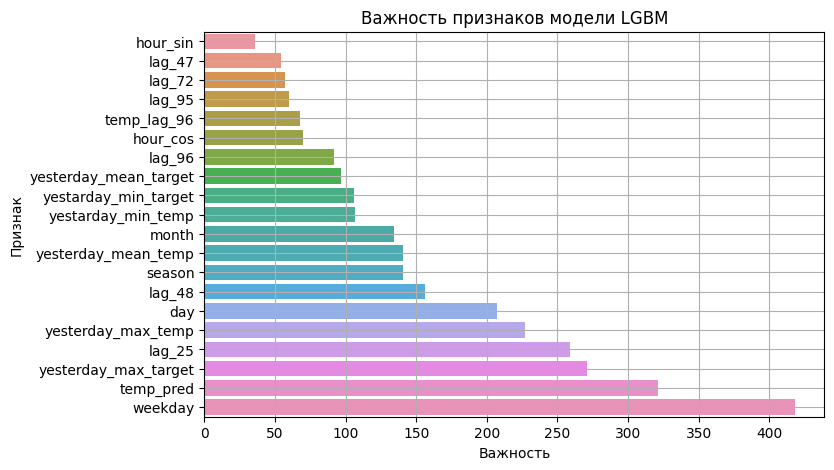

In [46]:
fig, ax = plt.subplots(figsize=(8, 5))
temp.sort_values(by='Важность', inplace=True)
sns.barplot(x=temp['Важность'], y=temp.index)
ax.set_xlabel('Важность')
ax.set_ylabel('Признак')
ax.set_title('Важность признаков модели LGBM')
ax.grid();

### Сравнение предсказания и реальных данных

Сравним предсказанный объём потребления и фактический.

In [47]:
'''
Функция для оформления графиков.
Принимает subplot, названия осей X и Y, название графика
'''

def description(ax, xlabel, ylabel, title):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title); 

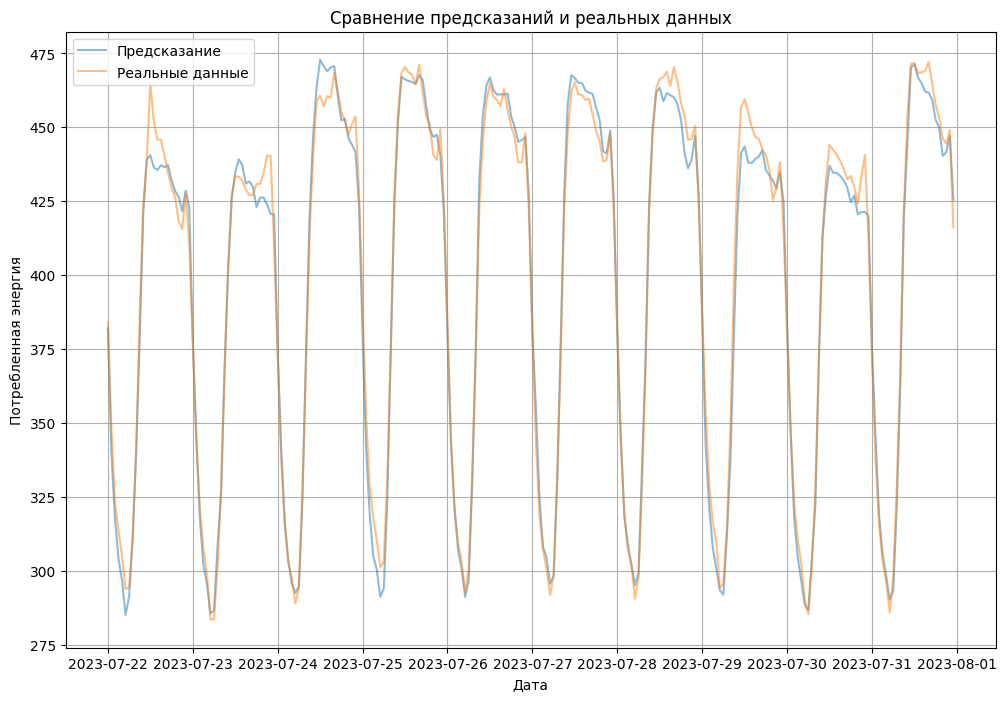

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=X_test.index[-240:], y=predict[-240:], ax=ax, alpha=0.5, ci=None)
sns.lineplot(x=X_test.index[-240:], y=y_test[-240:], ax=ax, alpha=0.5, ci=None)
ax.legend([ 'Предсказание', 'Реальные данные'])
description(
    ax,
    'Дата',
    'Потребленная энергия',
    'Сравнение предсказаний и реальных данных'
)
ax.grid();

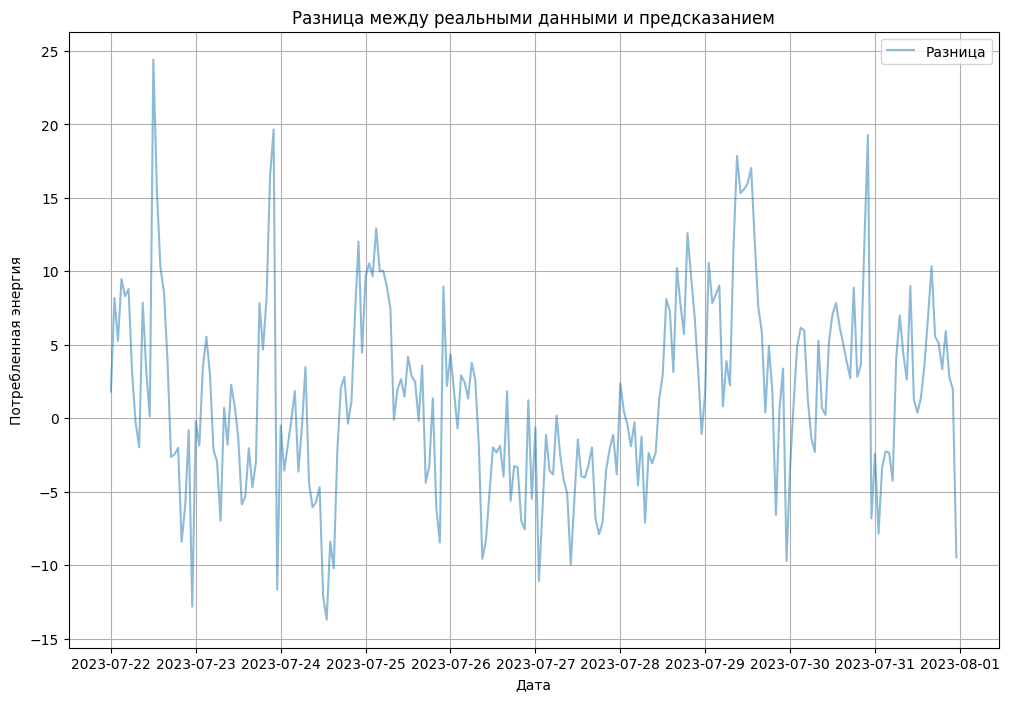

In [49]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=X_test.index[-240:], y=y_test[-240:] - predict[-240:], ax=ax, alpha=0.5, ci=None)
ax.legend([ 'Разница'])
description(
    ax,
    'Дата',
    'Потребленная энергия',
    'Разница между реальными данными и предсказанием'
)
ax.grid();

## Выгрузка предобученной модели

Выгрузим модель, обученную на полной выборке.

In [50]:
full_df = pd.concat([copy_train, copy_test])
full_train_x = full_df.drop('target', axis=1)
full_train_y = full_df['target']

In [51]:
full_model = lgbm.fit(full_train_x, full_train_y)
pickle.dump(full_model, open('model.pkl', 'wb'))

## Выводы

**Вывод:** В рамках решения задачи были выполнены следующие этапы:
- проведены исследование и предобработка данных,
- заполнены пропуски,
- выполнена проверка на дубликаты,
- данные визуализированы,
- сгенерированы новые признаки, как погодные, так и временные,
- обучены несколько моделей,
- по результатам кросс-валидации в качестве основной выбрана модель LightGBM со следующими гиперпараметрами: learning_rate = 0.09, num_leaves = 55, max_depth = 7, random_state = 42;
- выведена важность признаков: самыми влияющими оказались: предсказанная температура и день недели.


Финальные метрики по итогам прогнозирования на тестовой выборке:
1. MAE = 8.006
2. MAPE = 0.019
3. R2 = 0.975